In [23]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Exploration

In [24]:
# Load the data
df = pd.read_csv('music_dataset_mod.csv')
df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [25]:
# Explore how many genres are there in the target column
df['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

In [26]:
# We see that there are 110 rows with unknown genres
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [27]:
# Explore how many genres are there in the target column
df.isna().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

# Correlation

In [28]:
# Remove rows with missing genre labels
df_nonull = df.dropna()
df_nonull.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [29]:
# Split the data into features and target
X = df_nonull.drop(columns=['Genre'])
y = df_nonull['Genre']

In [30]:
# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [31]:
df_encoded = df_nonull.copy()
df_encoded.drop(columns=['Genre'], inplace=True)
df_encoded['Genre_encoded'] = y_encoded
df_encoded.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1


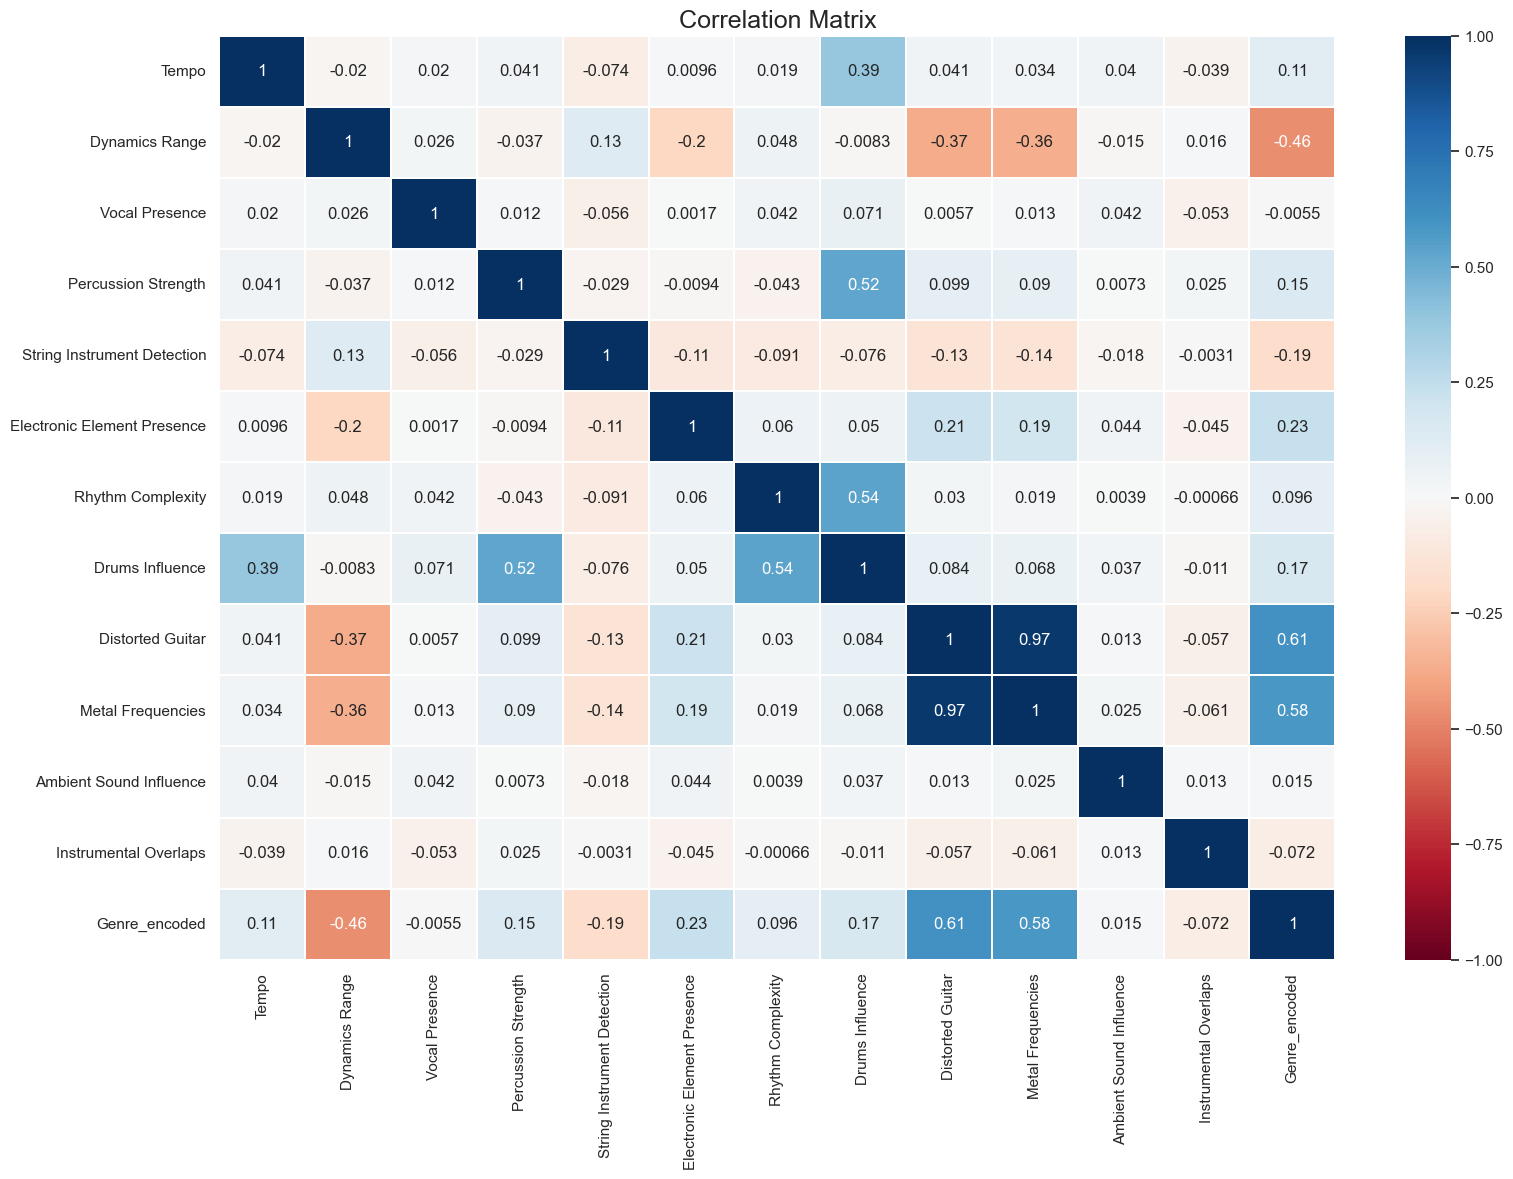

In [32]:
# Calculate the correlation matrix for the dataframe with numeric Genre values
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(18, 12))

sns.heatmap(correlation_matrix, 
            vmin=-1,
            vmax=1,
            annot=True, 
            cmap="RdBu", 
            linewidths=0.1)
plt.title("Correlation Matrix", fontsize=18)
plt.yticks(rotation=0)
plt.show()

Analyse graphique 

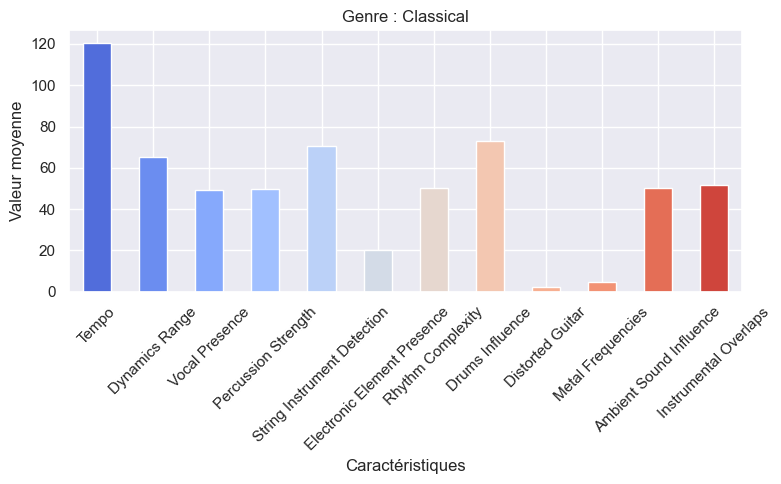

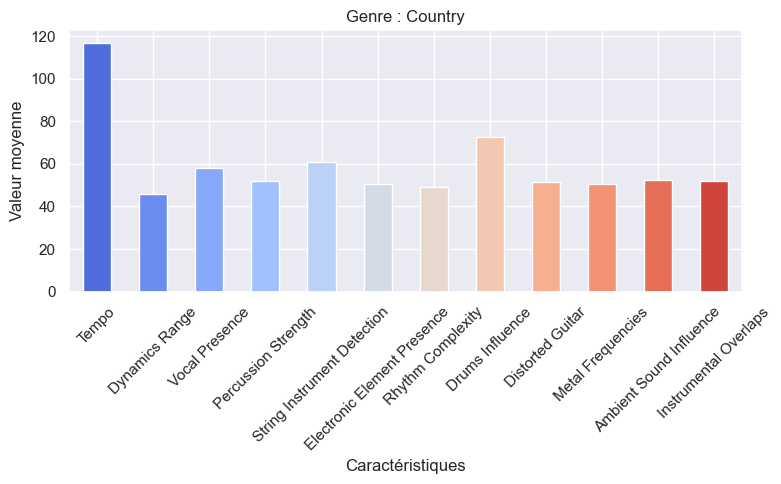

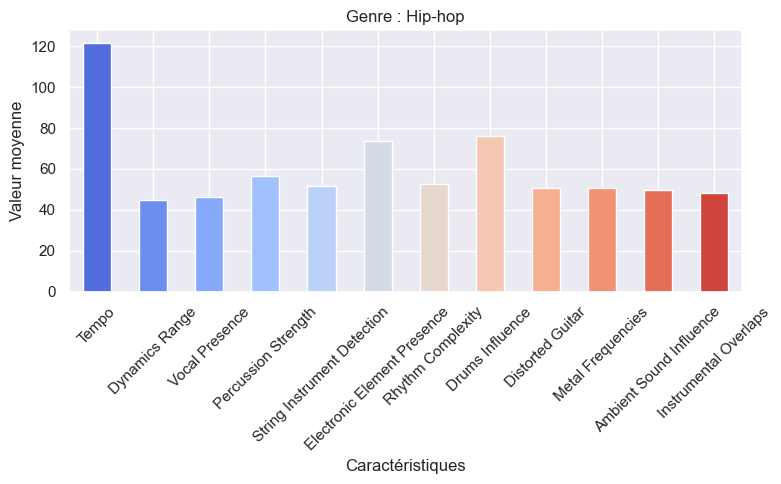

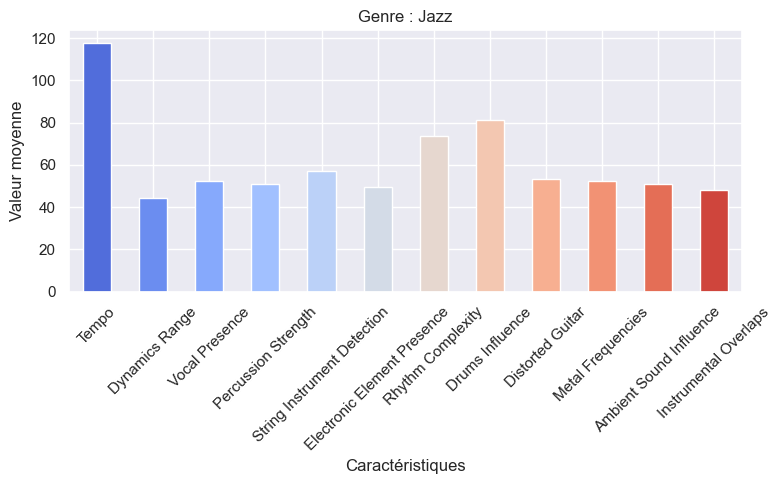

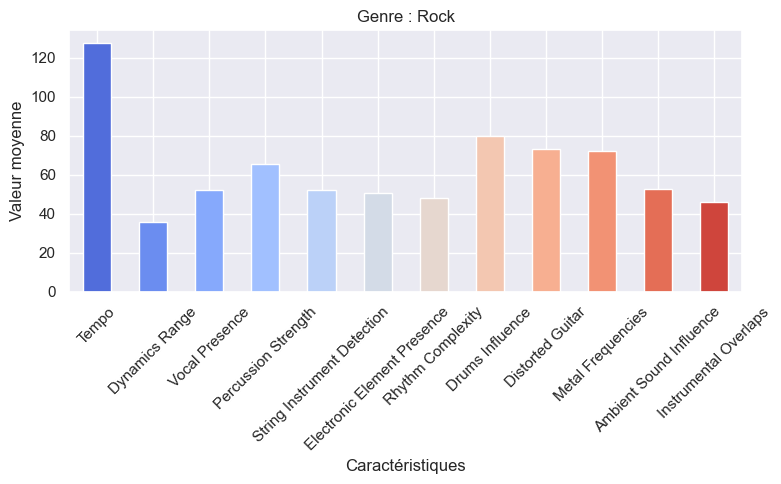

In [56]:
# Calcul des moyennes pour chaque genre
genre_means = df.groupby('Genre').mean()

# Palette Seaborn
palette = sns.color_palette("coolwarm", len(genre_means.columns))

# Créer un graphique pour chaque genre
for genre in genre_means.index:
    plt.figure(figsize=(8, 5))
    colors = palette[:len(genre_means.loc[genre])]  # Ajuste la palette au nombre de colonnes
    genre_means.loc[genre].plot(kind='bar', color=colors)
    plt.title(f"Genre : {genre}")
    plt.xlabel("Caractéristiques")
    plt.ylabel("Valeur moyenne")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


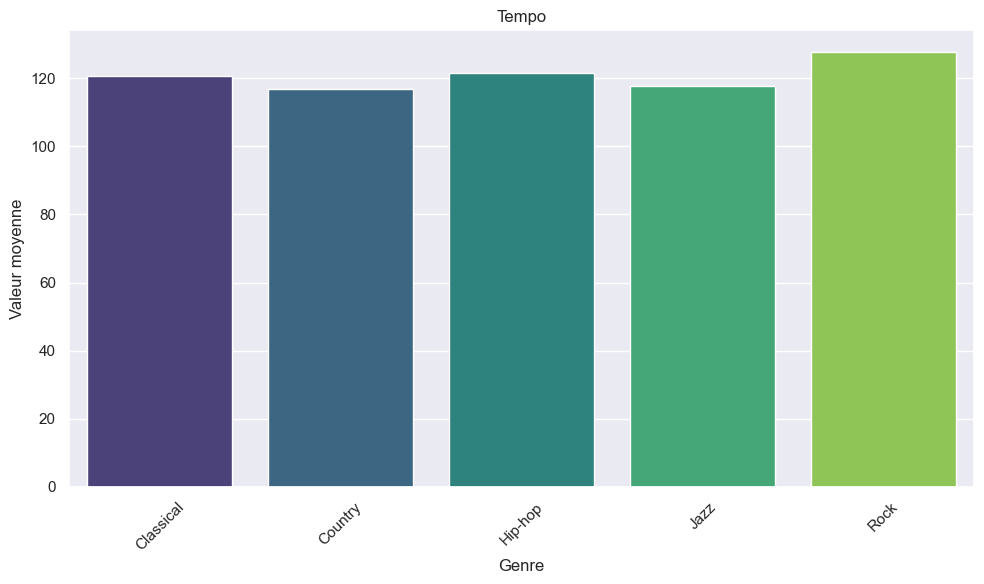

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


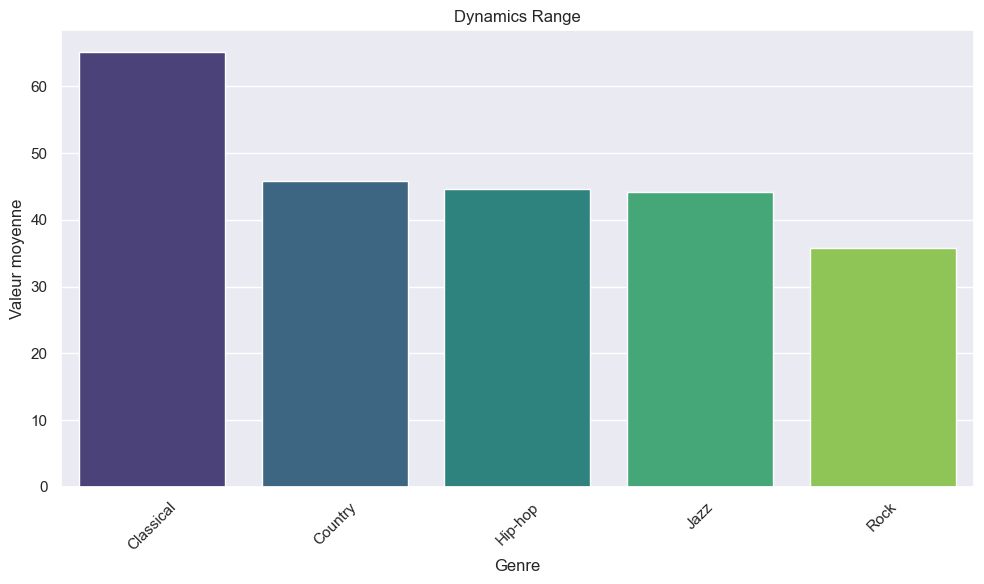

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


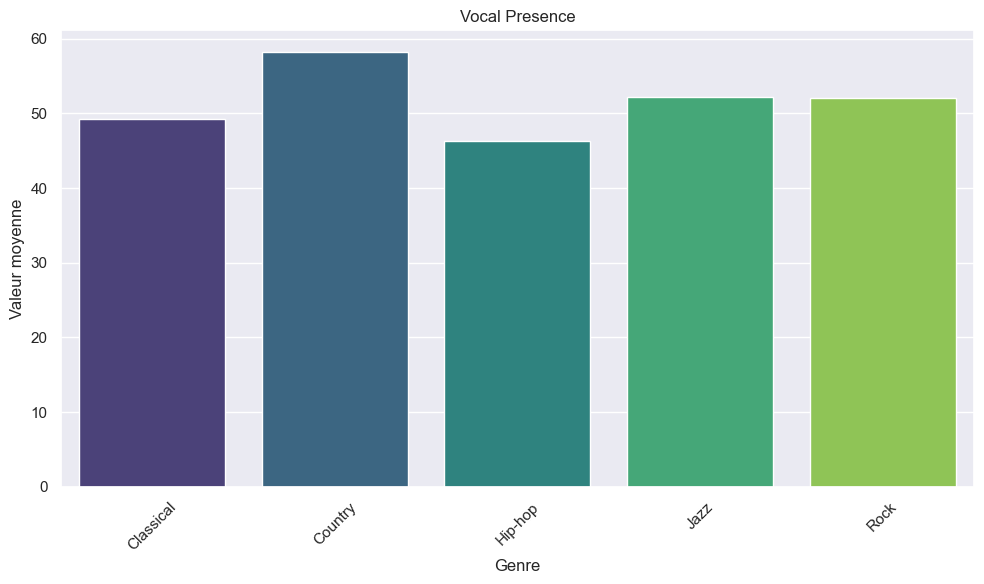

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


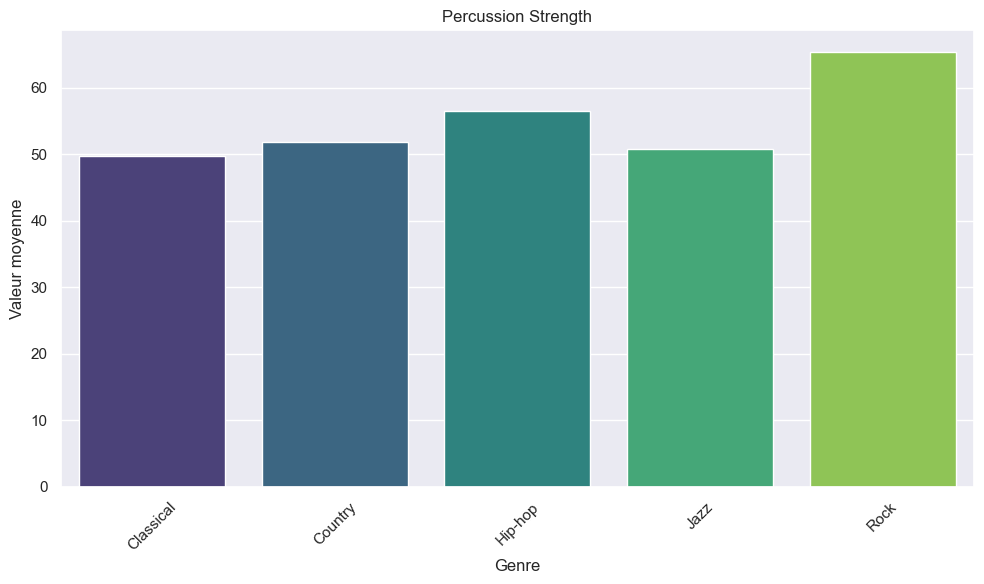

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


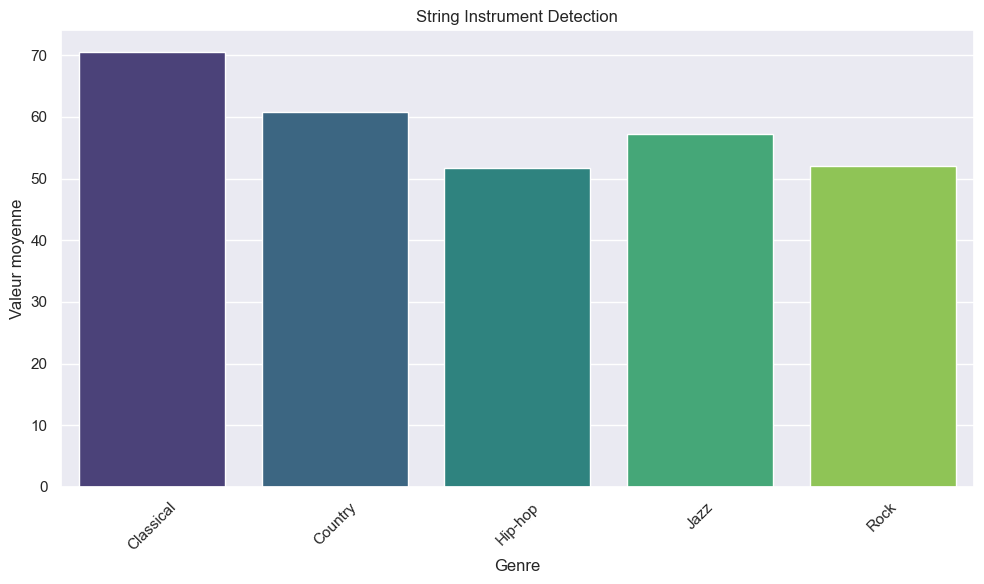

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


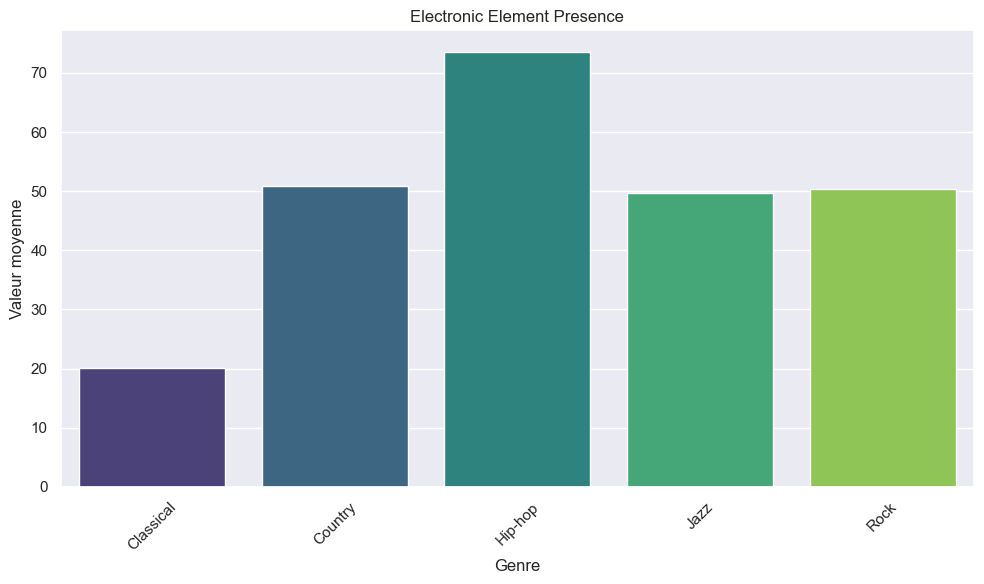

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


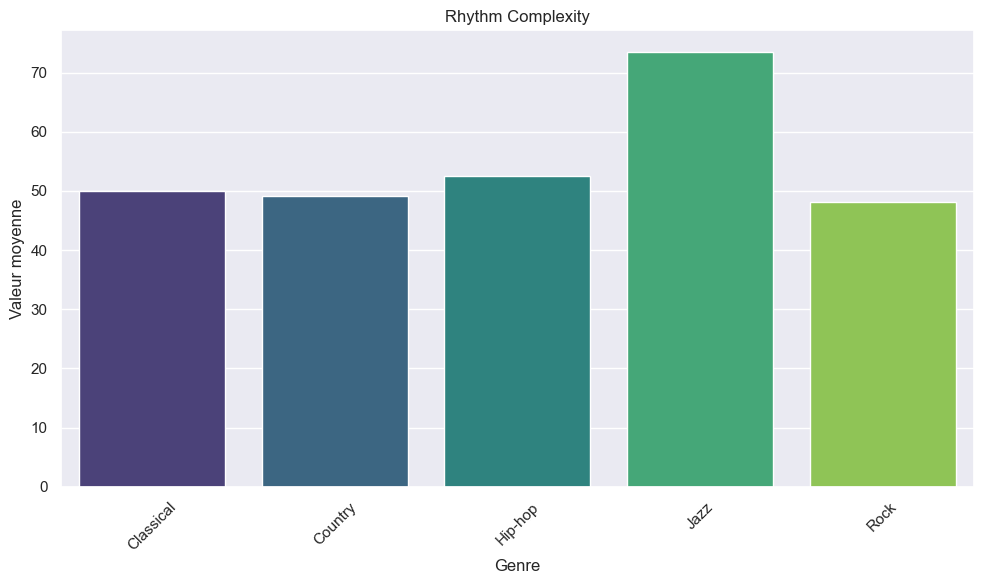

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


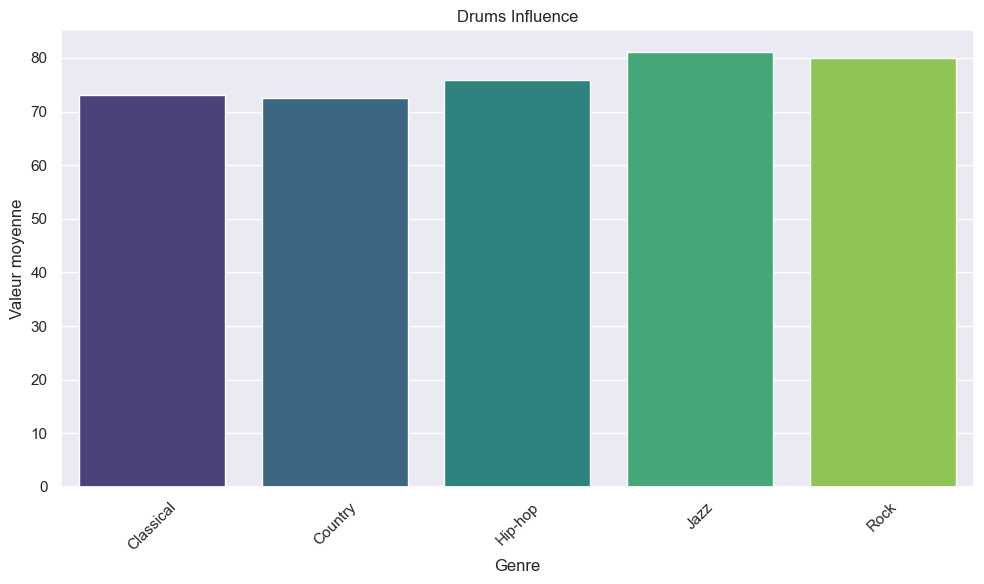

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


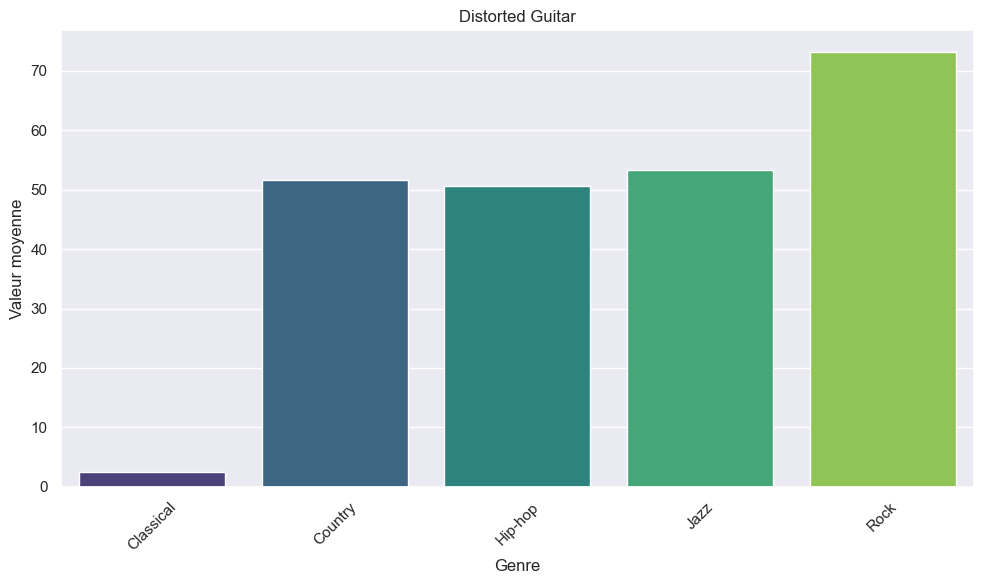

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


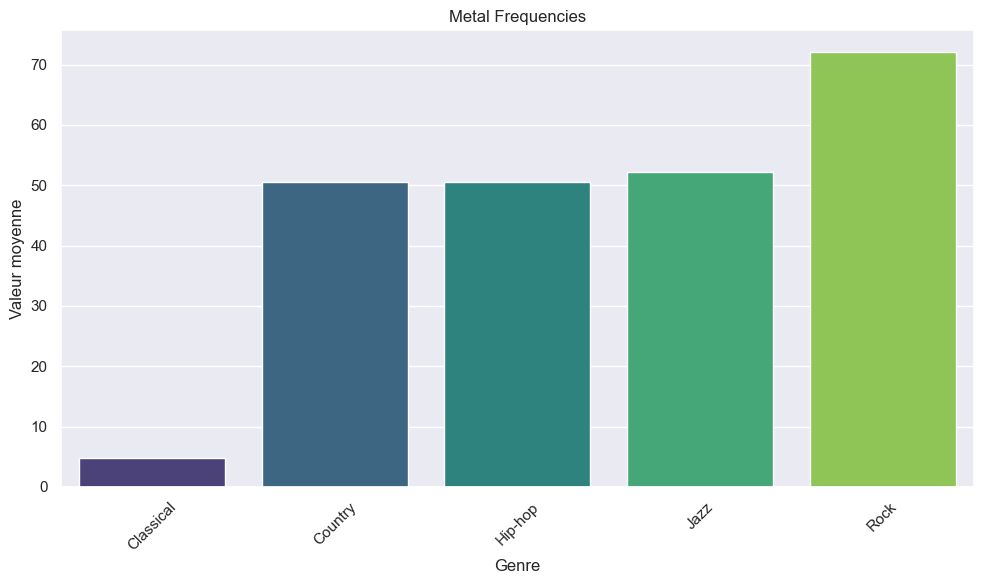

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


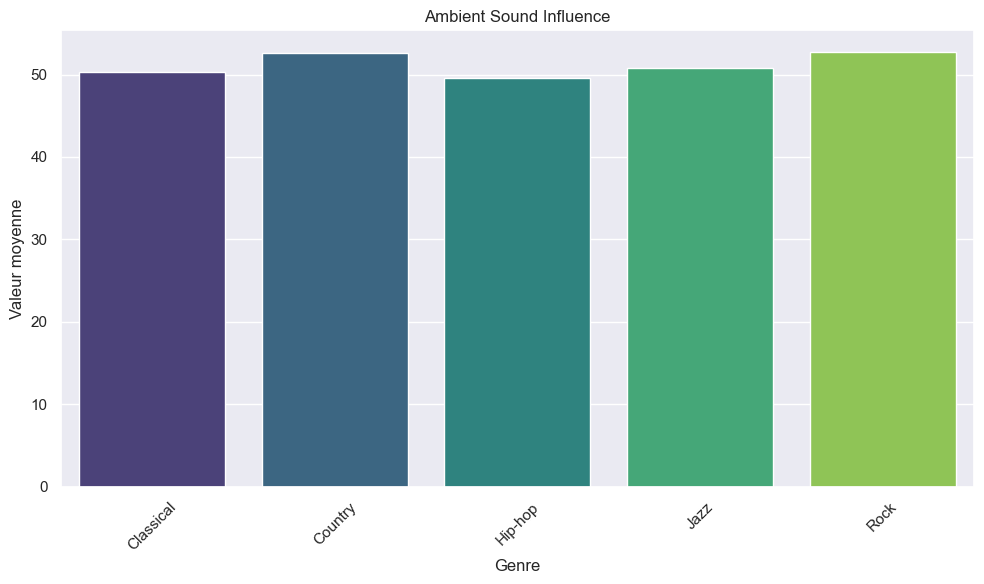

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/3482074162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')


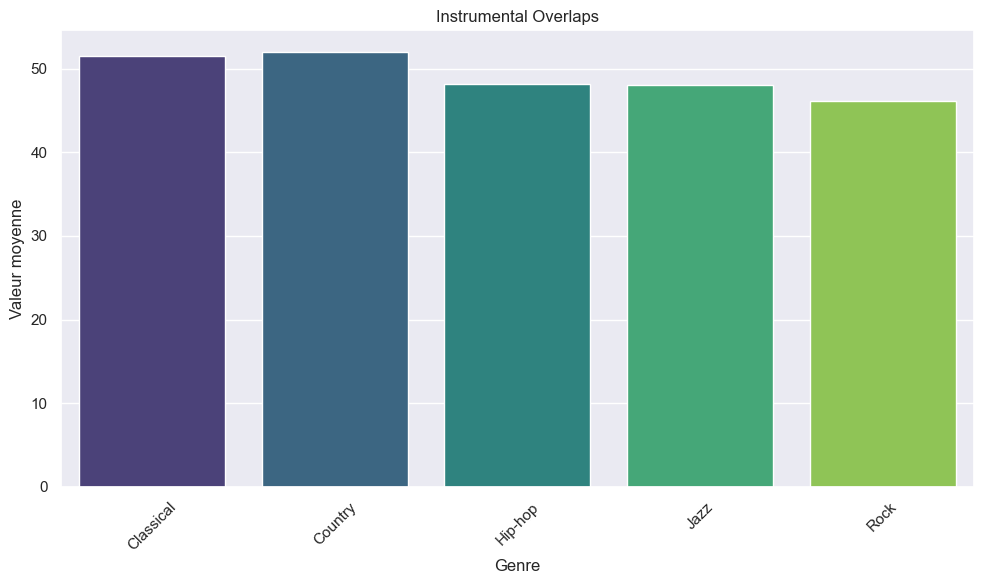

In [51]:
#Liste des caractéristiques pour lesquelles afficher les valeurs moyennes par genre
features = [
    'Tempo', 'Dynamics Range', 'Vocal Presence', 'Percussion Strength',
    'String Instrument Detection', 'Electronic Element Presence',
    'Rhythm Complexity', 'Drums Influence', 'Distorted Guitar',
    'Metal Frequencies', 'Ambient Sound Influence', 'Instrumental Overlaps'
]

# Créer un graphique pour chaque caractéristique, avec les valeurs moyennes pour tous les genres
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_means.index, y=genre_means[feature], palette='viridis')
    plt.title(f"{feature}")
    plt.ylabel("Valeur moyenne")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


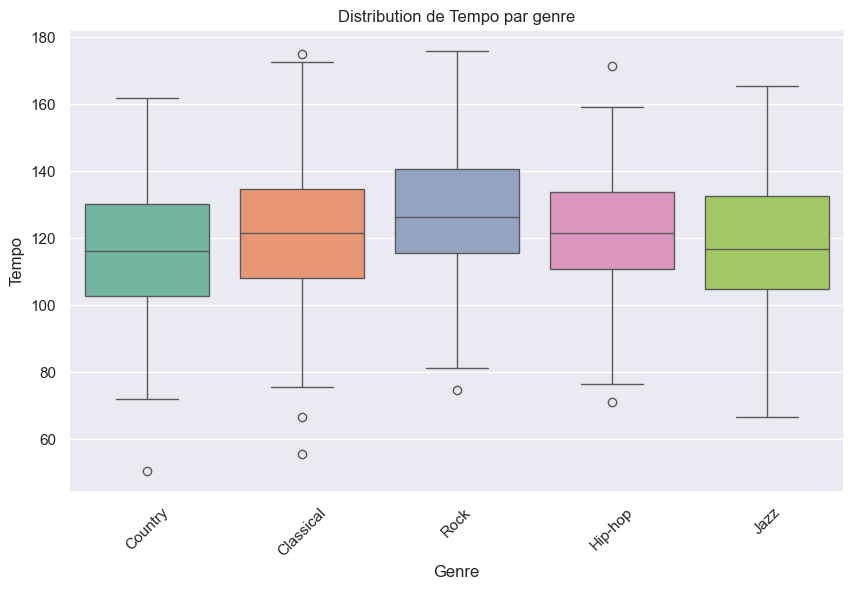

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


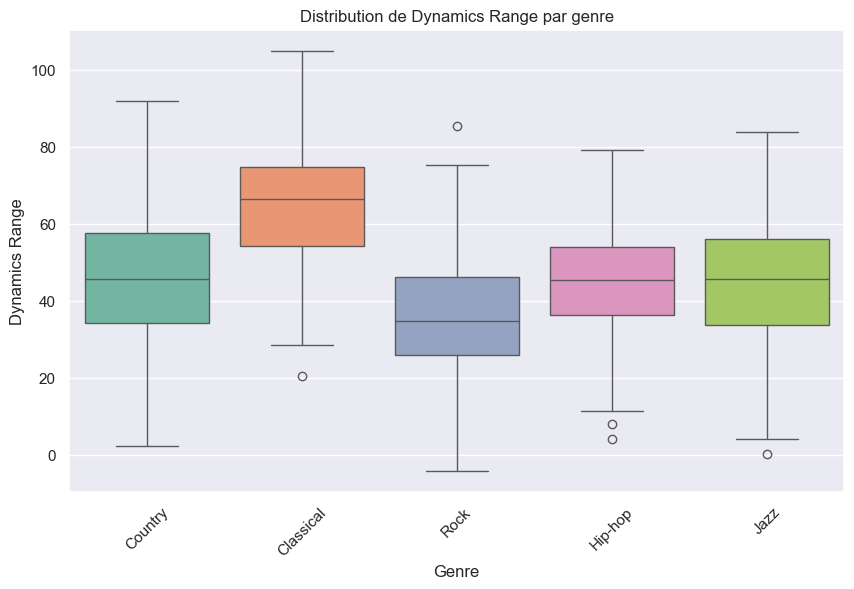

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


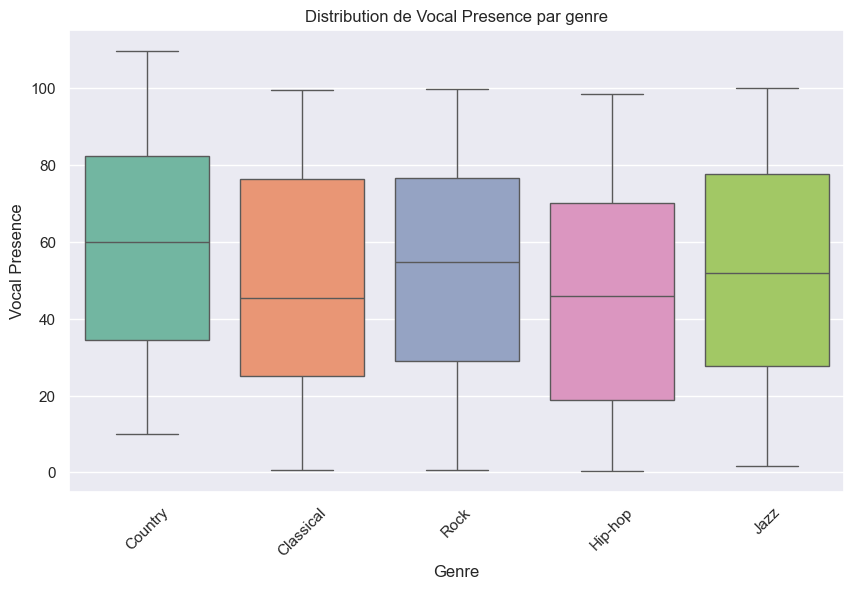

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


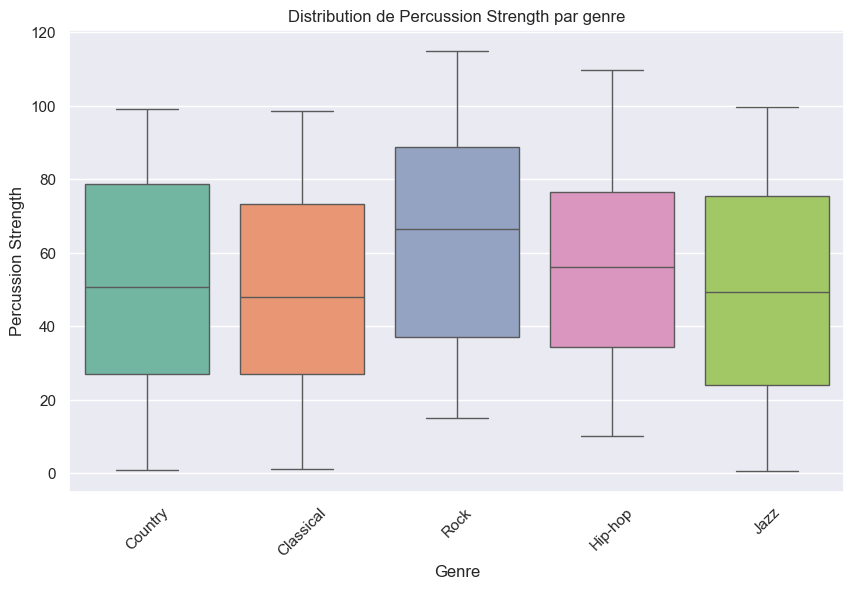

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


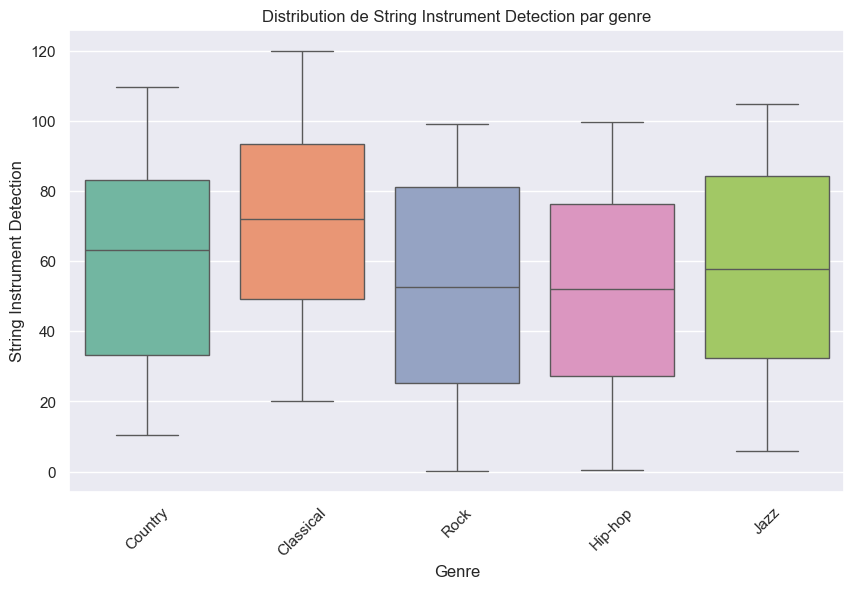

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


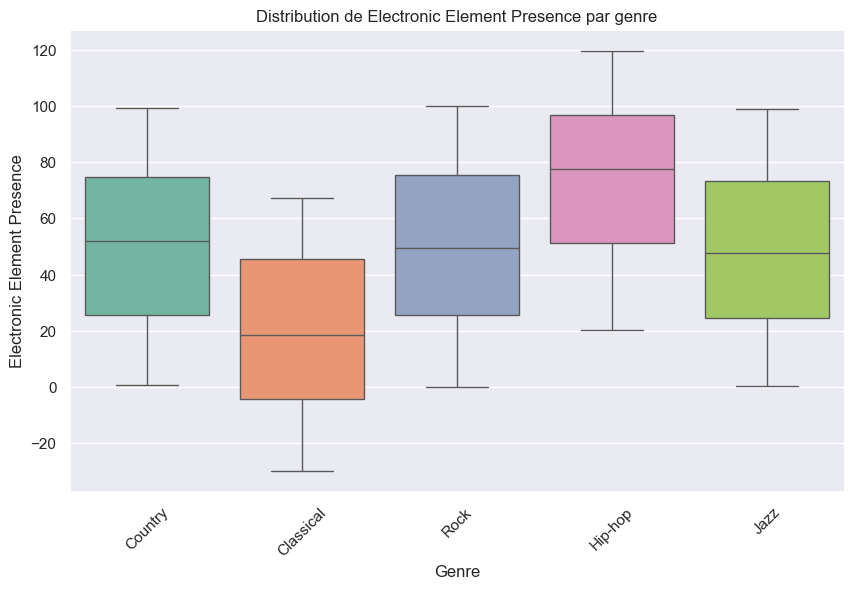

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


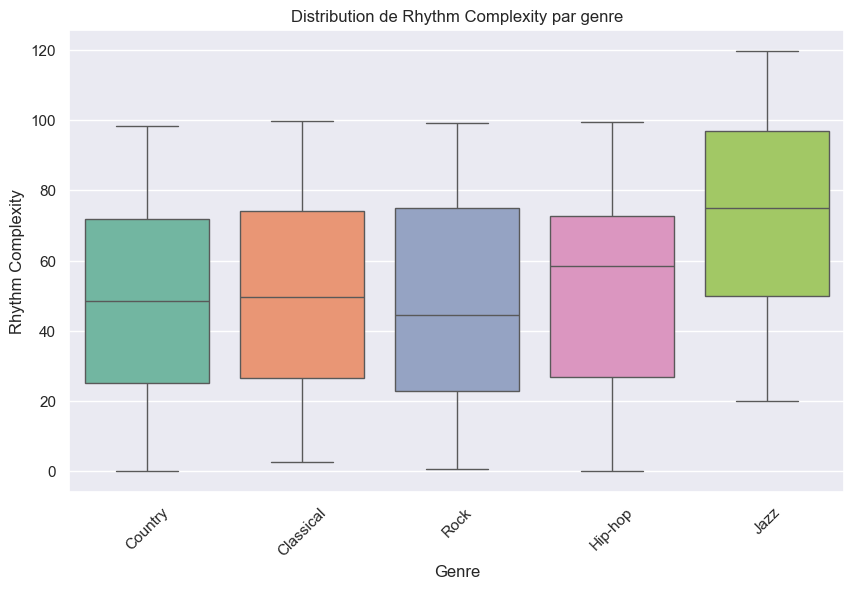

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


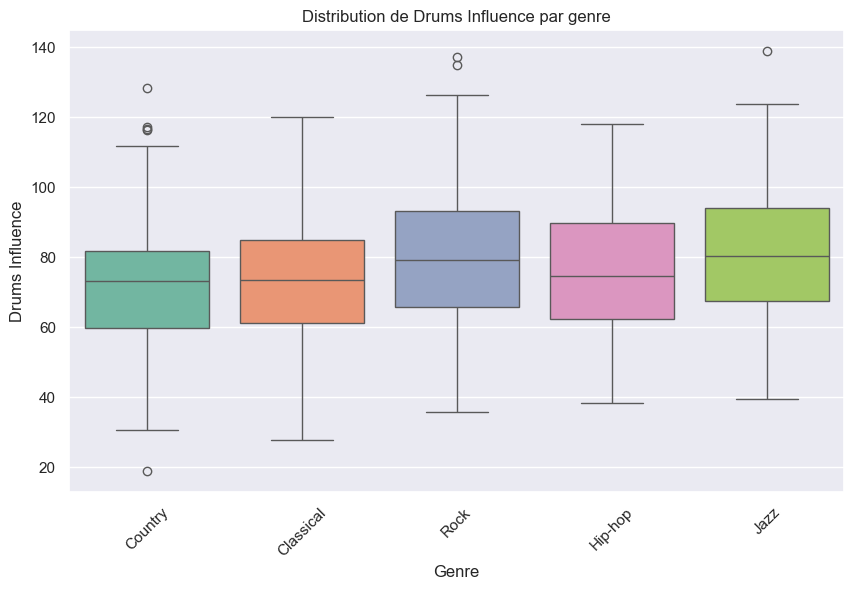

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


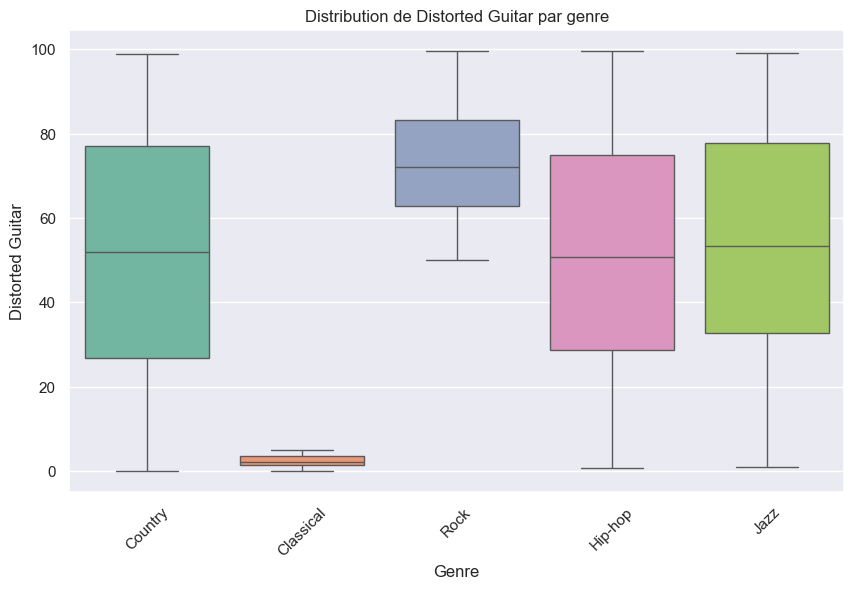

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


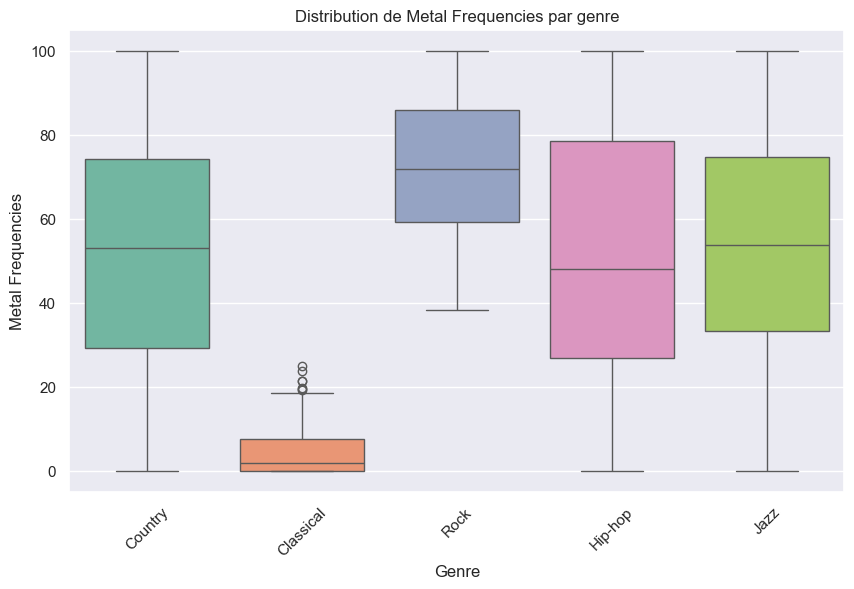

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


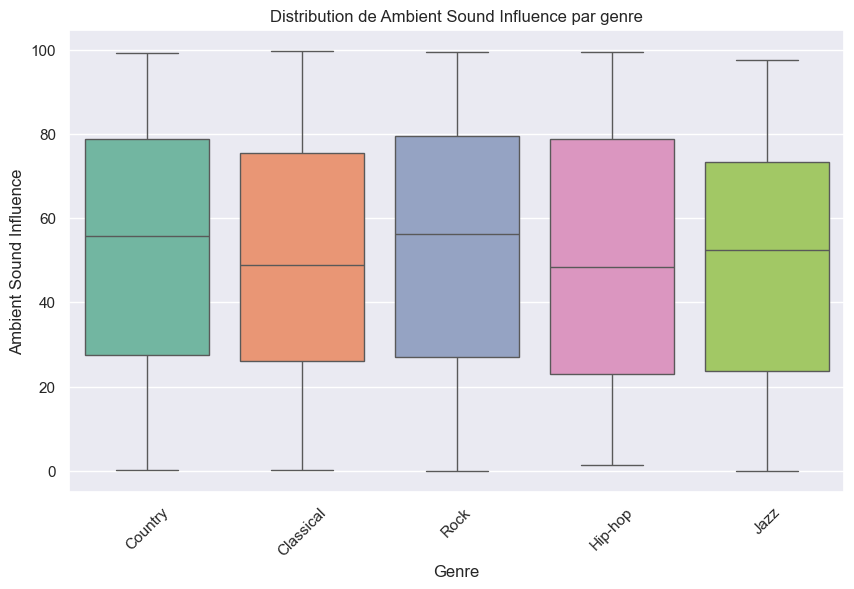

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_3249/2472884068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")


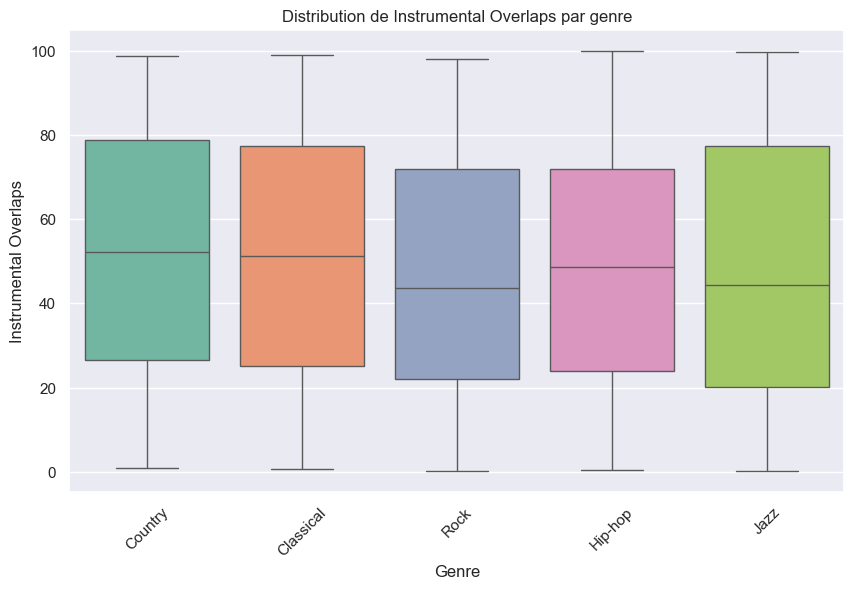

In [57]:
# Exemple de boxplot pour chaque caractéristique par genre
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Genre', y=feature, data=df, palette="Set2")
    plt.title(f"Distribution de {feature} par genre")
    plt.xticks(rotation=45)
    plt.show()


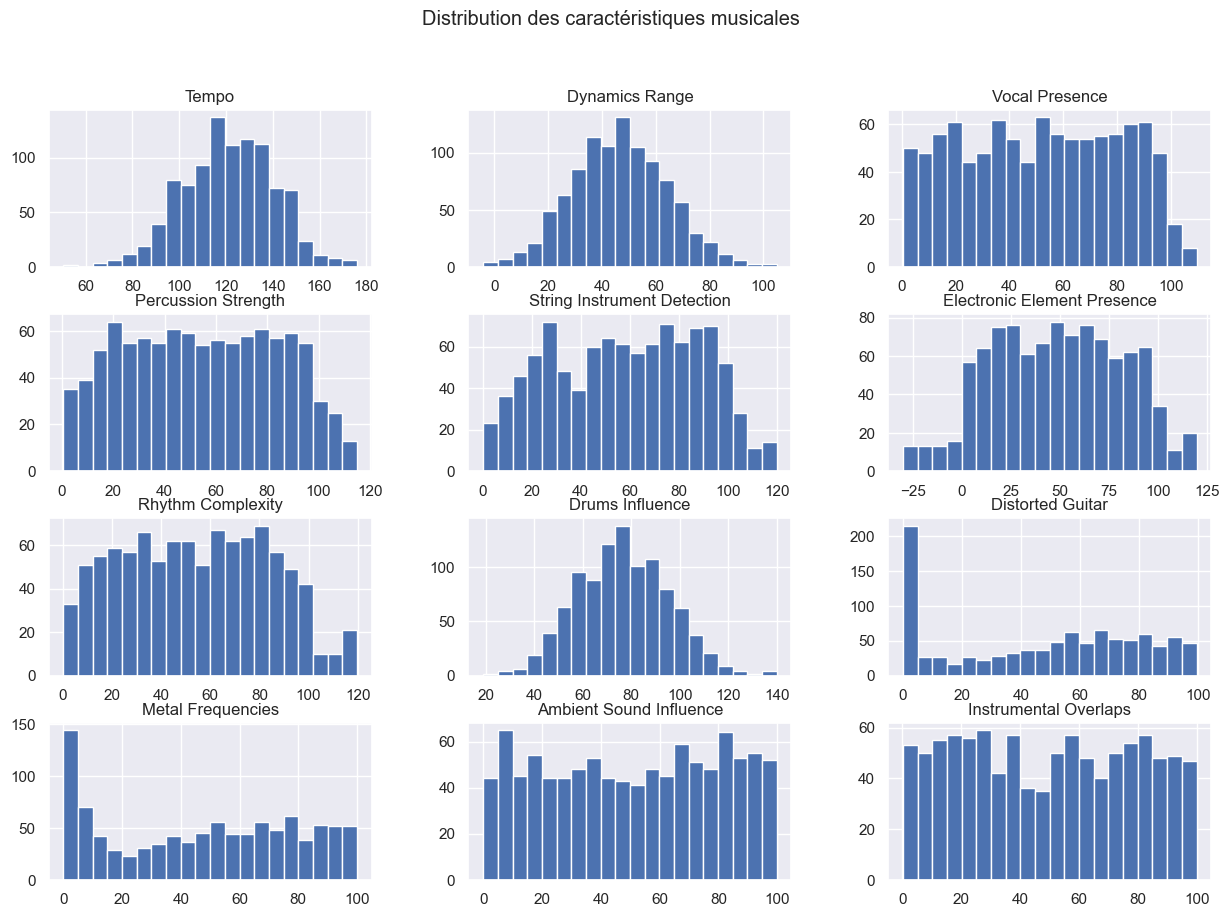

In [58]:
# Visualisation de la distribution de chaque caractéristique
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution des caractéristiques musicales")
plt.show()


# PCA for Dimensionality Reduction

In [ ]:
# Step 1: Standardize the features (excluding 'Genre' column)
features = df_nonull.drop(columns=['Genre'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [60]:
# Step 2: Apply PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [61]:
# Step 3: Analyze explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [62]:
# Step 4: Determine the number of components needed to capture at least 80% variance
num_components = np.argmax(cumulative_variance >= 0.80) + 1

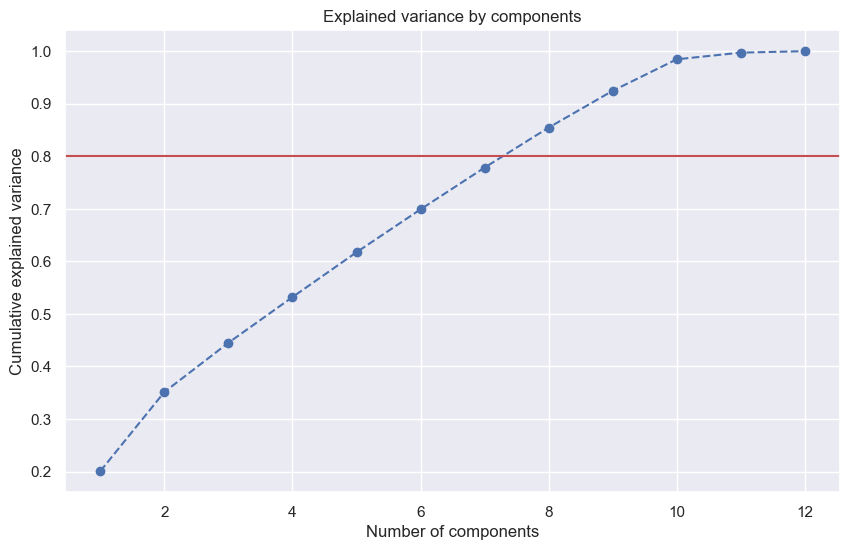

Number of principal components to capture at least 80% of variance: 8


In [64]:
# Cumulative variance - the variance captured up untill a certain component
plt.figure(figsize=(10,6))
plt.plot(range(1,13),explained_variance.cumsum(),marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

print(f"Number of principal components to capture at least 80% of variance: {num_components}")

In [38]:
# Given the PCA results, we can use the first eight principal components
pca = PCA(n_components=8) 
X_pca = pca.fit_transform(X_scaled)

# Evaluating Classification Efficacy: PCA-Transformed vs. Original Data

In [71]:
# Step 1: Split the data
X = df_nonull.drop(columns=['Genre'])
y = df_nonull['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression with PCs

In [72]:
# Step 3: Apply PCA for dimensionality reduction
pca = PCA(n_components=num_components)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [83]:
# Step 4: Train Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression(max_iter=10000, random_state=42)
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)

## Logistic Regression with Original Features

In [74]:
# Step 5: Train Logistic Regression on original data
log_reg_original = LogisticRegression(max_iter=10000, random_state=42)
log_reg_original.fit(X_train_scaled, y_train)
y_pred_original = log_reg_original.predict(X_test_scaled)


# Evaluate the models

In [84]:
# For PCA-transformed data
print("Logistic Regression with PCA-transformed features:")
print(f"Accuracy:, {accuracy_score(y_test, y_pred_pca):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_pca))

Logistic Regression with PCA-transformed features:
Accuracy:, 0.51
Classification Report:
               precision    recall  f1-score   support

   Classical       0.95      0.95      0.95        39
     Country       0.28      0.26      0.27        31
     Hip-hop       0.42      0.39      0.41        33
        Jazz       0.46      0.37      0.41        43
        Rock       0.39      0.53      0.45        32

    accuracy                           0.51       178
   macro avg       0.50      0.50      0.50       178
weighted avg       0.51      0.51      0.51       178



In [77]:
# For original data
print("\nLogistic Regression with original features:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_original):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_original))


Logistic Regression with original features:
Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

   Classical       0.95      0.97      0.96        39
     Country       0.29      0.32      0.31        31
     Hip-hop       0.48      0.36      0.41        33
        Jazz       0.57      0.47      0.51        43
        Rock       0.43      0.59      0.50        32

    accuracy                           0.56       178
   macro avg       0.55      0.54      0.54       178
weighted avg       0.56      0.56      0.55       178



# Genre Prediction and Integration

In [45]:
df_unknown_genre = df[df['Genre'].isnull()].copy()
df_unknown_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [46]:
# Prepare the data for prediction
X_unknown = df_unknown_genre.drop(columns=['Genre'])
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)

# Predict the genres
y_unknown_pred = classifier.predict(X_unknown_pca)

In [47]:
# Assign the predicted genres back to the DataFrame
df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)

In [48]:
# Display the DataFrame with predicted genres
df_unknown_genre[['Predicted_Genre']]

,Predicted_Genre
13,Classical
18,Country
22,Country
31,Rock
42,Rock
...,...
991,Hip-hop
992,Rock
993,Hip-hop
994,Hip-hop
